In [1]:
from keras.layers import *
from keras.models import Sequential

Using TensorFlow backend.


In [2]:
# Build a Model
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

In [3]:
# Compile the Model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [4]:
# Some Regularization Later

In [5]:
from keras.datasets import mnist
from keras.utils import to_categorical

In [6]:
((XTrain,YTrain),(XTest,YTest))=mnist.load_data()

In [7]:
print(XTrain.shape,YTrain.shape)
print(XTest.shape,YTest.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [8]:
def preprocess_data(X,Y):
    X=X.reshape((-1,28,28,1))
    X=X/255.0
    
    Y=to_categorical(Y)
    return X,Y

In [9]:
XTrain,YTrain=preprocess_data(XTrain,YTrain)

In [10]:
XTest,YTest=preprocess_data(XTest,YTest)

In [11]:
print(XTrain.shape,YTrain.shape)
print(XTest.shape,YTest.shape)

(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)


In [12]:
# Training
# Do on Google Colab using epochs=20
model.fit(XTrain,YTrain,epochs=1,validation_split=0.1,batch_size=128)

Train on 54000 samples, validate on 6000 samples
Epoch 1/1
54000/54000 [==============================] - 297s 6ms/step - loss: 0.2613 - accuracy: 0.9211 - val_loss: 0.0624 - val_accuracy: 0.9815


In [13]:
model.evaluate(XTest,YTest)

10000/10000 [==============================] - 22s 2ms/step


[0.0676413034196943, 0.9778000116348267]

In [14]:
# Without Pooling Number of Parameters will be very Large so do Pooling.

In [15]:
import matplotlib.pyplot as plt

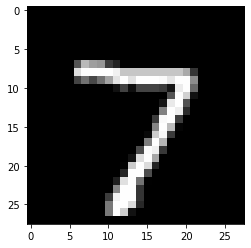

In [17]:
plt.imshow(XTest[0],cmap='gray')
plt.show()

In [18]:
with open("model.json", "w") as file:
    file.write(model.to_json())
model.save_weights("model.h5")

In [19]:
from keras.models import model_from_json

In [20]:
with open("model.json", "r") as file:
    model = model_from_json(file.read())
model.load_weights("model.h5")

In [23]:
model.predict_classes(XTest[0].reshape(1,28,28,1))[0]

7

In [60]:
from pred_fn import pred_val
pred_val(XTest[0])

7

In [48]:
y=XTest[0]
y=y.reshape(1,28,28,1)

In [49]:
model.predict_classes(y)

array([7], dtype=int64)